# Experiment Results for UMLP & UCNN
This notebook analyses / plots the results for the Unification MLP and Unification CNN networks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's accumulate the data into a csv from raw log files:

In [2]:
%%bash
for type in umlp ucnn urnn; do
  python3 utils/umlp_ucnn_process_logs.py results/"$type"_result/*_log.json > results/"$type"_results.csv
done

In [3]:
# Load respective data
df_umlp = pd.read_csv("results/umlp_results.csv")
# UMLP has an extra length column which is fixed and we don't need
df_umlp = df_umlp.drop(columns=['length', 'symbols'])
df_umlp['type'] = 'mlp'
df_ucnn = pd.read_csv("results/ucnn_results.csv")
df_ucnn = df_ucnn.drop(columns=['symbols'])
df_ucnn['type'] = 'cnn'
df_urnn = pd.read_csv("results/urnn_results.csv")
df_urnn = df_urnn.drop(columns=['length'])
df_urnn['type'] = 'rnn'
df = pd.concat([df_umlp, df_ucnn, df_urnn])

# The dataframe contain the training results at each iteration with experiment details
df.sample(5)

,batch_size,elapsed_time,embed,epoch,foldid,invariants,iteration,learning_rate,main/igacc,main/igloss,...,nouni,test/main/igacc,test/main/igloss,test/main/oacc,test/main/oloss,test/main/uacc,test/main/uloss,test/main/vloss,train_size,type
20270,64,308.524275,16,22,1,4,710,0.0100,0.9,0.238604,...,False,1.0,0.151913,0.961648,0.109372,0.939236,0.299574,0.229741,1000,rnn
20045,64,73.879958,16,10,0,4,460,0.0100,1.0,0.000735,...,False,1.0,0.000712,0.455605,4.617928,0.994792,0.018047,-606.376038,1000,mlp
15982,64,416.700659,16,1171,4,1,1830,0.0100,0.1,5.223971,...,False,0.0,0.918693,0.756453,0.612067,0.669115,0.723287,0.561421,50,rnn
2021,64,22.747132,32,6,0,1,220,0.0001,1.0,0.062423,...,False,1.0,0.061880,0.170313,2.450294,0.547500,1.331376,-0.467248,1000,cnn
6815,64,24.542647,32,4,4,3,160,0.0001,1.0,0.154253,...,False,1.0,0.145489,0.167634,2.383293,0.470313,1.492545,-1.254691,1000,cnn


In [4]:
# We'll create some extra computed columns for convenience
df['unification'] = ~df['nouni'] # Do we have unification enabled?
df['test/acc'] = df['test/main/uacc'].where(df.unification, df['test/main/oacc']) # Which test accuracy to pick?
df['test/er'] = 1-df['test/acc'] # Test error rate
df.sample(5)

,batch_size,elapsed_time,embed,epoch,foldid,invariants,iteration,learning_rate,main/igacc,main/igloss,...,test/main/oacc,test/main/oloss,test/main/uacc,test/main/uloss,test/main/vloss,train_size,type,unification,test/acc,test/er
2079,64,83.984120,32,23,0,1,800,0.0001,1.0,0.005230,...,0.229063,2.781478,0.940625,0.266046,-1.827636,1000,cnn,True,0.940625,0.059375
1367,64,183.331897,32,628,1,1,1680,0.0001,1.0,0.005679,...,0.290872,2.667466,0.130428,3.741848,0.000000,50,cnn,False,0.290872,0.709128
25025,64,32.599831,16,83,0,2,260,0.0001,1.0,0.672778,...,0.265625,2.591829,0.537760,1.316653,-1.285446,50,mlp,True,0.537760,0.462240
26571,64,225.767223,16,40,2,3,1720,0.0001,1.0,0.031283,...,0.384228,2.455934,0.992188,0.063610,-14.662409,1000,mlp,True,0.992188,0.007812
9985,64,328.172615,32,684,4,4,1860,0.0001,1.0,0.005275,...,0.234659,2.921844,0.669176,1.281794,-24.332119,50,cnn,True,0.669176,0.330824


## Does unification help with generalisation?
We will plot the test accuracy over iterations to see if unification helps with generalisation. We will take a single invariant case. Note base line also has single invariant although it doesn't use it, it is required to check if training the baseline for some reason also improves unification haphazardly.

In [5]:
# Filter data to get single invariants
df1 = df[(df.invariants == 1)]

# Adjust column names and types for plotting
df1['type'] = df1['type'].str.upper()
df1['unification'] = np.where(df1.unification, 'Yes', 'No')
df1['train_size'] = np.where((df1.train_size == 0) | (df1.train_size == 1000), '≤ 1000', '≤ 50')
df1 = df1.rename(columns={'unification': 'Unification', 'train_size': 'Training Size'})
df1.sample(5)

/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,batch_size,elapsed_time,embed,epoch,foldid,invariants,iteration,learning_rate,main/igacc,main/igloss,...,test/main/oacc,test/main/oloss,test/main/uacc,test/main/uloss,test/main/vloss,Training Size,type,Unification,test/acc,test/er
4812,64,12.658806,16,41,4,1,130,0.0010,1.0,0.015334,...,0.394420,2.097233,0.958333,0.209078,-3.265033,≤ 50,MLP,Yes,0.958333,0.041667
22425,64,90.442189,16,8,2,1,260,0.0001,0.6,0.679124,...,0.691112,0.685485,0.583198,0.689620,0.466499,≤ 1000,RNN,Yes,0.583198,0.416802
21658,64,49.507893,32,213,3,1,590,0.0100,1.0,0.000019,...,0.251011,6.169209,0.178309,5.326560,0.000000,≤ 50,CNN,No,0.251011,0.748989
911,64,317.279404,16,35,4,1,1120,0.0001,1.0,0.317235,...,0.893953,0.340992,0.740584,0.483209,0.500534,≤ 1000,RNN,No,0.893953,0.106047
22800,64,0.849500,32,0,4,1,10,0.0100,0.8,0.916674,...,0.169196,2.799035,0.269345,2.216663,-1.413035,≤ 1000,CNN,Yes,0.269345,0.730655


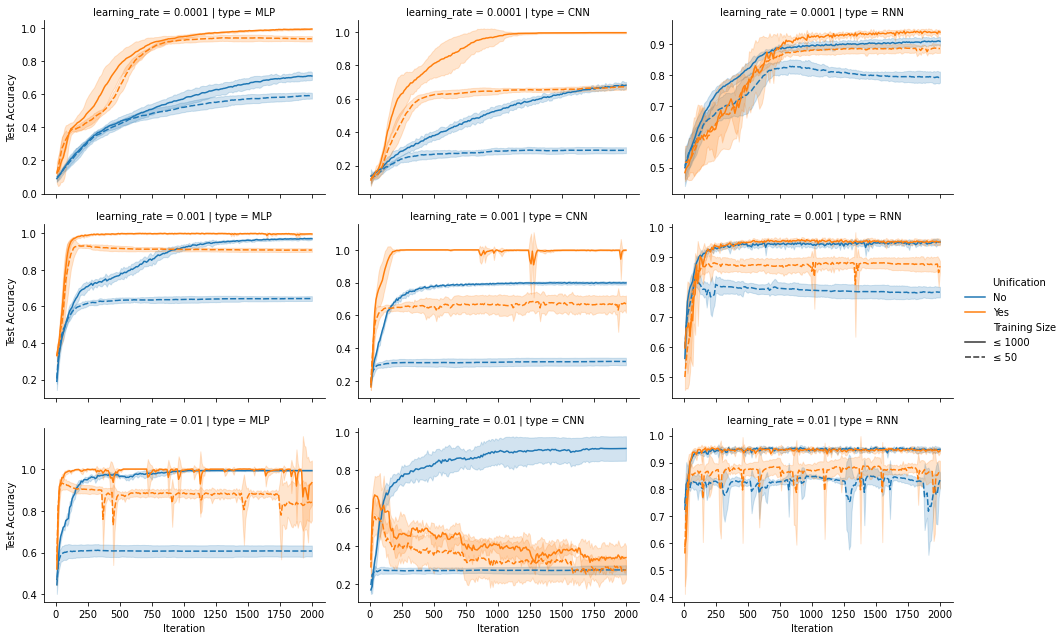

In [6]:
# Plot the test accuracy
g = sns.relplot(x='iteration', y='test/acc', hue='Unification',
                style='Training Size', kind='line', col='type', row='learning_rate', ci='sd',
                height=3, aspect=1.5, facet_kws={'sharey': False}, data=df1)
#g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Iteration")
#plt.ylim(0.1, 1.0)
#for i in range(3):
#    g.facet_axis(i, 2).set_ylim(0.5, 1.0)
g.savefig("results/umlp_ucnn_acc_plot.pdf", bbox_inches='tight')

## What's best result for each model type?
We will pick the best learning rate for each model type with and without unification for every dataset for the final comparison.

In [7]:
# We'll take the mean of last iterations to determine the convergence point
df_tail = df1[(df1.iteration > 1950)]
#dff.groupby(by=['type', 'Training Size', 'Unification', 'learning_rate'])['test/acc'].mean()
df_conv = pd.pivot_table(df_tail, index=['type', 'Training Size', 'Unification'], columns=['learning_rate'], values=['test/acc'], aggfunc={'test/acc': np.mean})
df_conv

test/acc                    
learning_rate                     0.0001    0.0010    0.0100
type Training Size Unification                              
CNN  ≤ 1000        No           0.679534  0.798162  0.913494
                   Yes          0.995813  0.984844  0.337679
     ≤ 50          No           0.292262  0.319384  0.274290
                   Yes          0.671754  0.672364  0.276189
MLP  ≤ 1000        No           0.709596  0.970184  0.992256
                   Yes          0.991908  0.996548  0.903202
     ≤ 50          No           0.590507  0.643019  0.607926
                   Yes          0.933785  0.908235  0.840508
RNN  ≤ 1000        No           0.909085  0.949899  0.948648
                   Yes          0.937992  0.950496  0.944059
     ≤ 50          No           0.792576  0.783268  0.806418
                   Yes          0.886022  0.869040  0.842714

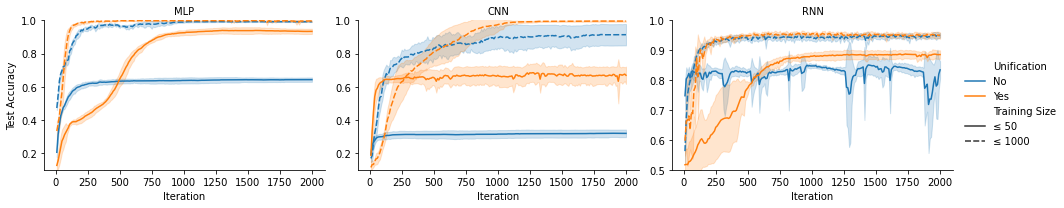

In [13]:
# Obtain best learning rate
df_best = df_conv['test/acc'].T.idxmax()
# Filter based on the best learning rate
best_filter = False
for ((mtype, tsize, uni), lrate) in zip(df_best.index.tolist(), df_best.values):
    best_filter |= ((df1.type == mtype) & (df1['Training Size'] == tsize) & (df1['Unification'] == uni) & (df1.learning_rate == lrate))
df_best = df1[best_filter]
# Plot the test accuracy
g = sns.relplot(x='iteration', y='test/acc', hue='Unification',
                style='Training Size', kind='line', col='type', ci='sd',
                height=3, aspect=1.5, facet_kws={'sharey': False, 'ylim': (0.1, 1.0)}, data=df_best)
g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.facet_axis(0, 2).set_ylim(0.5, 1.0)
g.set_xlabels("Iteration")
#g.savefig("results/umlp_ucnn_acc_best_plot.pdf", bbox_inches='tight')

## What is the effect of having more invariants?
We are now interested in increasing the number of invariants and looking at the change in performance. Since the tasks can be solved with a single invariant already, is there performance benefit of using multiple?

In [9]:
# Let's take only the unification cases
dfu = df[df.unification]

# Fix column names etc. for plotting
dfu['type'] = dfu['type'].str.upper()
dfu['train_size'] = np.where((dfu.train_size == 0) | (dfu.train_size == 1000), '≤ 1000', '≤ 50')
dfu = dfu.rename(columns={'train_size': 'Training Size'})

dfu.sample(5)

/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,batch_size,elapsed_time,embed,epoch,foldid,invariants,iteration,learning_rate,main/igacc,main/igloss,...,test/main/oacc,test/main/oloss,test/main/uacc,test/main/uloss,test/main/vloss,Training Size,type,unification,test/acc,test/er
23234,64,113.851952,16,224,1,1,350,0.0001,0.9,0.675478,...,0.734059,0.670350,0.755997,0.682844,0.460616,≤ 50,RNN,True,0.755997,0.244003
20625,64,109.094392,16,8,3,4,260,0.0100,1.0,0.068632,...,0.948390,0.137621,0.956913,0.168073,0.287580,≤ 1000,RNN,True,0.956913,0.043087
26055,64,227.986263,16,17,2,3,560,0.0001,0.8,0.571001,...,0.856778,0.479925,0.875487,0.319333,0.316209,≤ 1000,RNN,True,0.875487,0.124513
19728,64,548.534416,16,825,3,3,1290,0.0100,1.0,0.006691,...,0.898359,0.429325,0.911774,0.967651,0.220704,≤ 50,RNN,True,0.911774,0.088226
15900,64,122.118221,32,371,4,2,1010,0.0010,1.0,0.000104,...,0.237901,7.996362,0.721474,1.706048,-64.985489,≤ 50,CNN,True,0.721474,0.278526


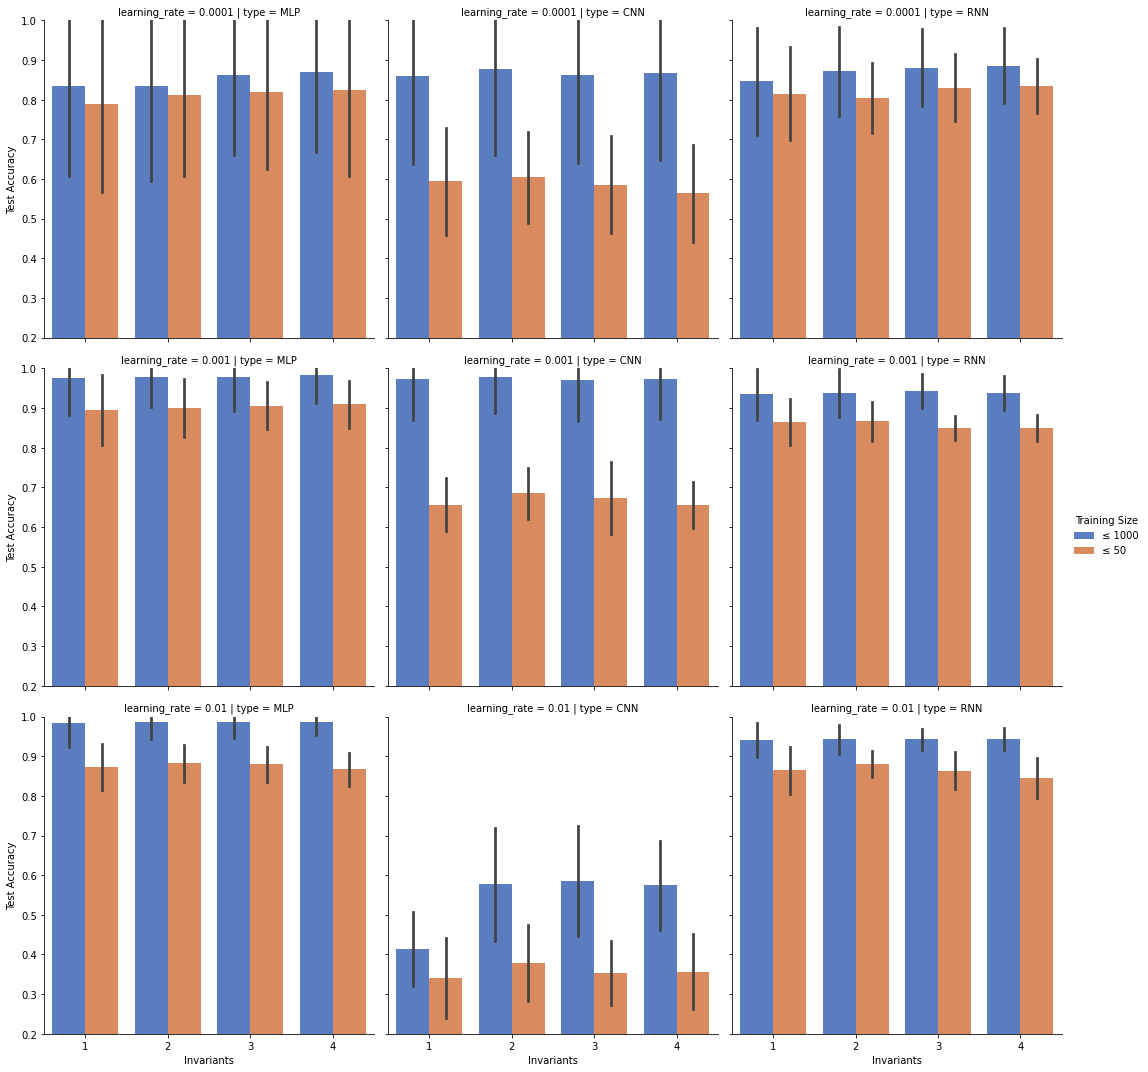

In [10]:
# Plot the test accuracy
g = sns.catplot(x='invariants', y='test/acc', hue='Training Size',
                col='type', row='learning_rate', kind='bar', ci='sd', data=dfu, palette='muted')
#g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Invariants")
plt.ylim(0.2, 1.0)
g.savefig("results/umlp_ucnn_invs_plot.pdf", bbox_inches='tight')

# Visualising an invariant
Here we take an invariant from the sentiment analysis task and visualise the variableness of each of the symbols in the sentence.

In [10]:
import re
# Load the output file
train_size = 50 # 50 or 1000
fold_id = 4 # range(5)
outf = f"urnn_result/urnn_l20_i1_e16_t{train_size}_f{fold_id}.out"
with open(outf, 'r') as f:
    outs = f.read().splitlines() # Gets without trailing \n
# Find and get invariant
inv_str = outs[outs.index('Inv:') + 1].split(' -> ')
inv = eval(inv_str[0]) # ['vivid', 'with', ...]
label = int(inv_str[1]) # 1 for positive 0 for negative
# Find and get vmap
vmap = np.array(eval(re.sub('\s+', ',', outs[outs.index('vmap:') + 1].strip()[1:-1])))
# Combine them
inv_map = pd.DataFrame({'Symbol': inv, 'Variableness': vmap})

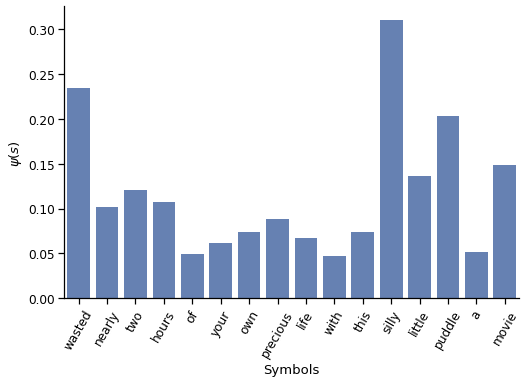

In [11]:
# Plot the vmap
sns.set_context("notebook", font_scale=1.1)
g = sns.catplot(x='Symbol', y='Variableness', kind='bar', data=inv_map, color='#597dbf', aspect=1.5)
#g.set_titles("Variable Map")
g.set_ylabels("$\psi(s)$")
g.set_xlabels("Symbols")
plt.xticks(rotation=60)
g.savefig("sentiment_inv.pdf", bbox_inches='tight')